### **Travail de :**
#  - Kpodjro KPATOUKPA
#  - Lyse Priscille NGASSEU NDIFO

# Q1: Importer le dataset AirPassengers


In [2]:
!pip -q install kagglehub

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import kagglehub

In [5]:
# Download latest version
path = kagglehub.dataset_download("rakannimer/air-passengers")

100%|██████████| 764/764 [00:00<00:00, 1.68MB/s]

Extracting files...


In [7]:
path

'/root/.cache/kagglehub/datasets/rakannimer/air-passengers/versions/1'

In [8]:
!ls  /root/.cache/kagglehub/datasets/rakannimer/air-passengers/versions/1

AirPassengers.csv


In [9]:
df = pd.read_csv(path+"/AirPassengers.csv")
df.shape

(144, 2)

# Q2: Affichage des 5 premières lignes


In [10]:
print("Les 5 premières lignes :")
print(df.head())

Les 5 premières lignes :
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


# Q3: Conversion de la colonne date en index temporel


In [11]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

In [13]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Q4 : Visualisation de la série


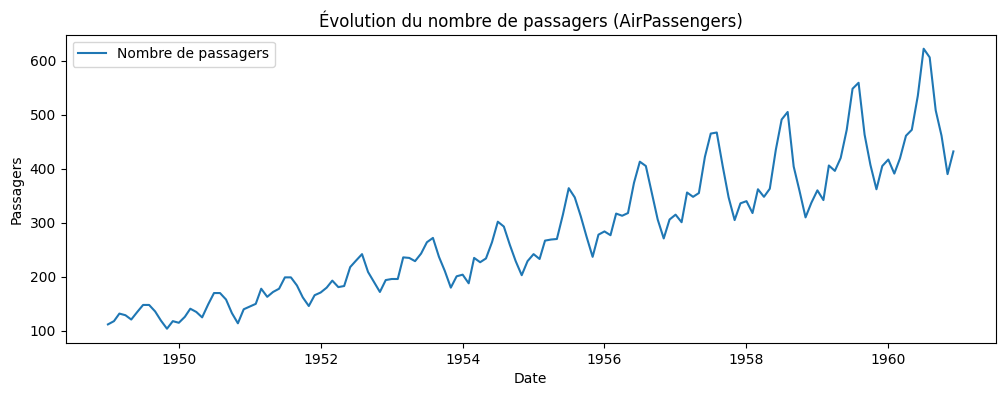

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(df, label="Nombre de passagers")
plt.title("Évolution du nombre de passagers (AirPassengers)")
plt.xlabel("Date")
plt.ylabel("Passagers")
plt.legend()
plt.show()

# Q5 : Calcul et traçage de la moyenne mobile (fenêtre 12 mois)


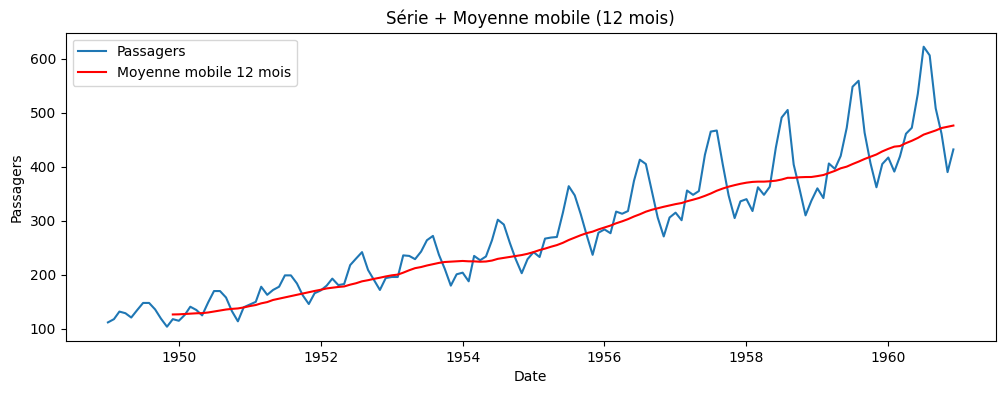

In [15]:

df['MA12'] = df['#Passengers'].rolling(window=12).mean()

plt.figure(figsize=(12, 4))
plt.plot(df['#Passengers'], label="Passagers")
plt.plot(df['MA12'], label="Moyenne mobile 12 mois", color="red")
plt.title("Série + Moyenne mobile (12 mois)")
plt.xlabel("Date")
plt.ylabel("Passagers")
plt.legend()
plt.show()

# Q6 : Décomposition de la série


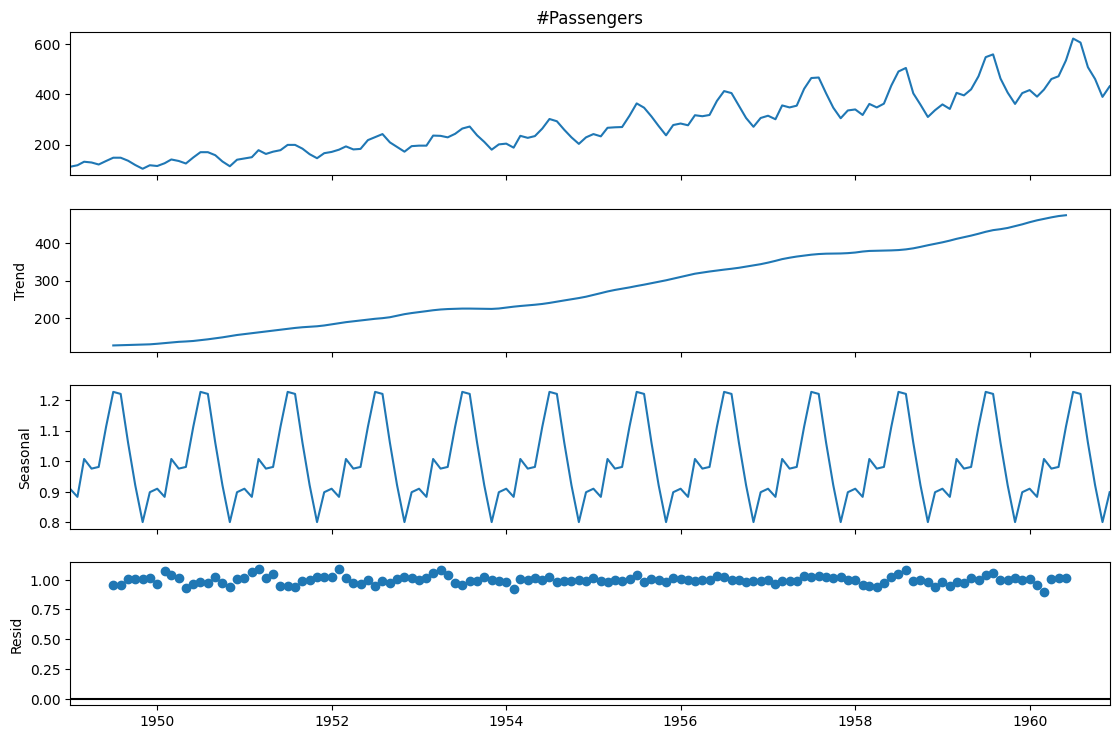

In [16]:
decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative')

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()
